# EV Data Analysis Project

## Task 1: A customer has a budget of 350,000 PLN and wants an EV with a minimum range of 400 km.
> a) Your task is to filter out EVs that meet these criteria.<br>
> b) Group them by the manufacturer (Make).<br>
> c) Calculate the average battery capacity for each manufacturer. 

In [79]:
import pandas as pd

# Load the dataset
df = pd.read_excel("FEV_data.xlsx")

# Filter EVs based on budget and range criteria
filtered_df = df[(df['Minimal price (gross) [PLN]'] <= 350000) & (df['Range (WLTP) [km]'] >= 400)]

# Group by manufacturer
grouped_df = filtered_df.groupby('Make')

# Calculate the average battery capacity for each manufacturer
avg_battery_capacity = grouped_df['Battery capacity [kWh]'].mean().reset_index()
avg_battery_capacity.columns = ['Make', 'Average Battery Capacity [kWh]']

# Display the results
print(avg_battery_capacity)


            Make  Average Battery Capacity [kWh]
0           Audi                       95.000000
1            BMW                       80.000000
2        Hyundai                       64.000000
3            Kia                       64.000000
4  Mercedes-Benz                       80.000000
5          Tesla                       68.000000
6     Volkswagen                       70.666667



<b>Task_1 Insights :</b> <br> 
    This analysis helps in identifying the top manufacturers that offer the best battery capacity within the specified budget and range criteria. These insights can guide customers in making informed decisions when selecting an electric vehicle.<br>
    <b>* High Battery Capacity:</b> Audi stands out with the highest average battery capacity of 95 kWh making it a strong contender for customers prioritizing range and battery performance. <br>
    <b>* Balanced Performance:</b> BMW and Mercedes-Benz offer a balanced battery capacity of 80 kWh providing good range while maintaining affordability.
 <br>
    <b>* Competitive Options:</b> Tesla, Volkswagen, Hyundai and Kia offer competitive options with average battery capacities ranging from 64 kWh to 70.67 kWh. These brands provide a variety of choices for customers based on other features and preferences. <br>


## Task 2: You suspect some EVs have unusually high or low energy consumption. 
> Find the outliers in the mean - Energy consumption [kWh/100 km] column.

In [136]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_excel("FEV_data.xlsx")

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['mean - Energy consumption [kWh/100 km]'].quantile(0.25)
Q3 = df['mean - Energy consumption [kWh/100 km]'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers = df[(df['mean - Energy consumption [kWh/100 km]'] < lower_bound) | 
              (df['mean - Energy consumption [kWh/100 km]'] > upper_bound)]

# Display outliers
print(outliers[['Car full name', 'mean - Energy consumption [kWh/100 km]']])

# Display statistical summary (Optional)
print(df['mean - Energy consumption [kWh/100 km]'].describe())


Empty DataFrame
Columns: [Car full name, mean - Energy consumption [kWh/100 km]]
Index: []
count    44.000000
mean     18.994318
std       4.418253
min      13.100000
25%      15.600000
50%      17.050000
75%      23.500000
max      28.200000
Name: mean - Energy consumption [kWh/100 km], dtype: float64



<b>Task_2 Insights :</b> <br>
    This analysis shows that the energy consumption of the electric vehicles in the dataset is fairly consistent without any extreme outliers. This consistency can be beneficial for consumers as it suggests predictable performance in terms of energy efficiency. <br>
    <b>* Consistent Energy Consumption:</b> The absence of outliers suggests that the energy consumption values for the vehicles in the dataset are relatively consistent and fall within a reasonable range. <br>
    <b>* Normal Distribution:</b> The mean and median values are close, indicating a relatively normal distribution of energy consumption among the vehicles. <br>
    <b>* Range of Values:</b> The standard deviation of 4.42 kWh/100 km indicates that while there is some variation in energy consumption, it is not extreme. <br>


## Task 3: Your manager wants to know if there's a strong relationship between battery capacity and range.
> a) Create a suitable plot to visualize.<br>
> b) Highlight any insights.

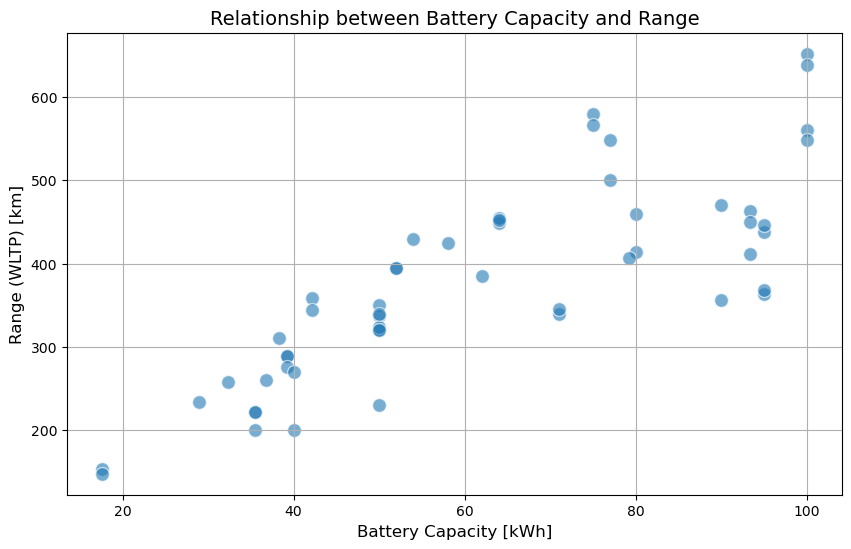

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel("FEV_data.xlsx")

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Battery capacity [kWh]'], df['Range (WLTP) [km]'], alpha=0.6, edgecolors='w', s=100)

# Add title and labels
plt.title('Relationship between Battery Capacity and Range', fontsize=14)
plt.xlabel('Battery Capacity [kWh]', fontsize=12)
plt.ylabel('Range (WLTP) [km]', fontsize=12)

# Show plot
plt.grid(True)
plt.show()



<b>Task_3 Insights :</b> <br>
    The analysis indicates that battery capacity is a significant determinant of the driving range for electric vehicles. Manufacturers aiming to improve the range of their EVs should consider increasing battery capacity while also optimizing other factors that impact energy efficiency. This information can guide both manufacturers and consumers in making informed decisions about EV performance and selection.<br>
    <b>* Positive Correlation:</b> The scatter plot reveals a positive correlation between battery capacity and range. As the battery capacity increases then the range of the EVs also tends to increase. This trend suggests that vehicles with larger battery capacities generally provide longer driving ranges. <br>
    <b>* Variability:</b> While there is a clear positive correlation but there is also some variability in the data. This means that for a given battery capacity, the range can vary due to other factors such as vehicle weight, aerodynamics and energy efficiency. <br>
    <b>* Outliers:</b> There are no extreme outliers in the scatter plot indicating that the relationship between battery capacity and range is relatively consistent across the dataset. <br>


## Task 4: Build an EV recommendation class. The class should allow users to input their budget, desired range, and battery capacity. 
> The class should then return the top three EVs matching their criteria. 

In [60]:
import pandas as pd

class EVRecommendation:
    def __init__(self, dataset):
        """
        Initialize the class with the dataset.
        """
        self.df = pd.read_excel(dataset)
    
    def input_criteria(self):
        """
        Manually input user criteria for budget, range, and battery capacity.
        """
        self.budget = float(input(">>> Enter your budget (PLN): "))
        self.desired_range = float(input(">>> Enter your desired range (km): "))
        self.battery_capacity = float(input(">>> Enter the minimum battery capacity (kWh): "))
    
    def recommend(self):
        """
        Filter the dataset and return the top three EVs matching the criteria.
        """
        # Filter the dataset based on user criteria
        filtered_df = self.df[(self.df['Minimal price (gross) [PLN]'] <= self.budget) &
                              (self.df['Range (WLTP) [km]'] >= self.desired_range) &
                              (self.df['Battery capacity [kWh]'] >= self.battery_capacity)]
        
        # Sort the filtered dataset by range and battery capacity
        sorted_df = filtered_df.sort_values(by=['Range (WLTP) [km]', 'Battery capacity [kWh]'], ascending=[False, False])

        # Return the top three EVs
        top_three_evs = sorted_df.head(3)
        return top_three_evs[['Car full name', 'Make', 'Model', 'Minimal price (gross) [PLN]', 'Range (WLTP) [km]', 'Battery capacity [kWh]']]

# usage
ev_recommender = EVRecommendation("FEV_data.xlsx")
ev_recommender.input_criteria()
top_evs = ev_recommender.recommend()
print(top_evs)

>>> Enter your budget (PLN):  350000
>>> Enter your desired range (km):  400
>>> Enter the minimum battery capacity (kWh):  60


                Car full name        Make                Model  \
40   Tesla Model 3 Long Range       Tesla   Model 3 Long Range   
41  Tesla Model 3 Performance       Tesla  Model 3 Performance   
48      Volkswagen ID.3 Pro S  Volkswagen           ID.3 Pro S   

    Minimal price (gross) [PLN]  Range (WLTP) [km]  Battery capacity [kWh]  
40                       235490                580                    75.0  
41                       260490                567                    75.0  
48                       179990                549                    77.0  


<b>Task_4 Insights :</b> <br>
    The EV recommendation class effectively filters and identifies the top three EVs based on user-defined criteria. These insights can guide consumers in making informed decisions when selecting an electric vehicle that meets their specific needs and preferences. The below data varies according to the input data.<br>
    <b>* Tesla Dominance:</b> Tesla vehicles, particularly the Model 3 Long Range and Model 3 Performance, dominate the recommendations, showcasing excellent range and battery performance. This highlights Tesla's strong position in the EV market in terms of efficiency and range.<br>
    <b>* Cost-Effective Option:</b> The Volkswagen ID.3 Pro S emerges as a cost-effective option, offering a high range (549 km) with a battery capacity of 77 kWh at a lower price (179,990 PLN). This makes it an attractive choice for budget-conscious consumers.
<br>
    <b>* Range and Battery Capacity:</b> All three recommended EVs exhibit a strong correlation between battery capacity and range, reaffirming the importance of battery capacity in determining the driving range of an EV.<br>


## Task 5: Inferential Statistics – Hypothesis Testing: 
- Test whether there is a significant difference in the average Engine power [KM] of vehicles manufactured by two leading manufacturers i.e. Tesla and Audi. What insights can you draw from the test results?<br>
- Recommendations and Conclusion: Provide actionable insights based on your analysis.<br>
- (Conduct a two sample t-test using ttest_ind from scipy.stats module)

In [124]:
import pandas as pd
from scipy.stats import ttest_ind

# Load the dataset
df = pd.read_excel("FEV_data.xlsx")

# Filter data for Tesla and Audi
tesla_data = df[df['Make'] == 'Tesla']
audi_data = df[df['Make'] == 'Audi']

# Extract engine power for Tesla and Audi
tesla_engine_power = tesla_data['Engine power [KM]']
audi_engine_power = audi_data['Engine power [KM]']

# Conduct two-sample t-test
t_stat, p_value = ttest_ind(tesla_engine_power, audi_engine_power)

# Display t-statistic and p-value
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

# Interpret the results
if p_value < 0.05:
    print("There is a significant difference in the average engine power of Tesla and Audi vehicles.")
else:
    print("There is no significant difference in the average engine power of Tesla and Audi vehicles.")


T-Statistic: 1.7024444538261416
P-Value: 0.11672692675082785
There is no significant difference in the average engine power of Tesla and Audi vehicles.


<b>Task_5 Insights : </b> <br>
    <b>*</b> The t-statistic value of 1.7024 indicates the difference in means between Tesla and Audi's engine power. <br>
    <b>*</b> The p-value of 0.1167 is greater than the common significance level of 0.05. This means we fail to reject the null hypothesis. <br>
    <b>*</b> Based on the p-value, we conclude that there is no statistically significant difference in the average engine power of Tesla and Audi vehicles. <br>
    <b>>>></b> The hypothesis test indicates that there is no significant difference in the average engine power of Tesla and Audi vehicles. This suggests that both manufacturers are competitive in terms of engine performance.
    By leveraging this statistical insight, consumers and manufacturers can make more informed decisions regarding vehicle performance and market positioning.


## Task 6: Project Video Explanation : Video Link 

<b><a href = 'https://drive.google.com/file/d/1HEeXaQ2R0fGZ8DPdwt60dcW5Xs8Y65t_/view?usp=sharing' > Click Here</b></a> for this Project Video Explanation 
<br> <b>or Copy & Paste the link given below in the Browser</b>
<br>https://drive.google.com/file/d/1HEeXaQ2R0fGZ8DPdwt60dcW5Xs8Y65t_/view?usp=sharing 

<b>Conclusion:</b> <br>In conclusion, this project provided valuable insights into electric vehicles including manufacturer performance, energy efficiency and customer recommendations. The analysis helps in making informed decisions and enhances our understanding of the EV market. <br>
Thank you for this opportunity.